In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/meal-delivery-forecast/data.csv


In [1]:
import pandas as pd
import joblib
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score,mean_absolute_percentage_error,make_scorer

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor


import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.layers import LSTM,Dense,Dropout
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping


2024-09-02 10:48:54.901597: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-02 10:48:54.904373: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-02 10:48:55.002301: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-02 10:48:55.460023: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-02 10:48:58.710328: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [3]:
  from statsmodels.tsa.arima.model import ARIMA
  from statsmodels.tsa.stattools import adfuller
  from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [4]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.api import VAR
import statsmodels.api as sm

In [5]:
df=pd.read_csv('/kaggle/input/meal-delivery-forecast/data.csv')

In [6]:
df.head()

,Unnamed: 0,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,213354,1,93,1971,261,289,1,0,528,461,34,0,3.9,10,2
1,52285,1,83,1248,152,240,0,0,107,659,77,0,5.3,0,1
2,58666,1,67,1248,251,253,0,0,26,638,56,1,7.0,0,1
3,226680,1,17,1902,387,446,0,0,55,517,56,0,3.2,1,1
4,256134,1,139,2581,584,613,1,1,149,693,34,2,2.8,7,0


In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df2=df.copy()

In [14]:
df3=df.copy()

In [15]:
df4=df.copy()

In [9]:
df5=df.copy()

In [477]:

df["meal_profitability"] = df["base_price"] - df["checkout_price"]
df["meal_profitability"] = df["meal_profitability"].astype("int")

df["meal_profitability_percentage"] = (df["meal_profitability"] / df["base_price"]) * 100
df["meal_profitability_percentage"] = df["meal_profitability_percentage"].astype("int")

df["center_type_city_code"] = df["center_type"].astype(str) + "_" + df["city_code"].astype(str)

df["category_cuisine"] = df["category"].astype(str) + "_" + df["cuisine"].astype(str)
df["center_id_category"] = df["center_id"].astype(str) + "_" + df["category"].astype(str)

df["food_price_trend"] = df.groupby("meal_id")["base_price"].transform(lambda x: x.diff())
df["food_price_trend"] = df["food_price_trend"].fillna(0)
df["food_price_trend"] = df["food_price_trend"].astype("int")

df["category_center_type"] = df["category"].astype(str) + "_" + df["center_type"].astype(str)

df["featured_shown"] = df["emailer_for_promotion"].astype(str) + "_" + df["homepage_featured"].astype(str)

df["price_change_rate"] = (df["checkout_price"] - df["base_price"]) / df["base_price"]
df["price_change_rate"] = df["price_change_rate"].astype("int")
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to specified columns
for col in ["center_type_city_code", "category_cuisine", "center_id_category", "category_center_type", "featured_shown"]:
    df[col] = label_encoder.fit_transform(df[col])

# Now, 'df' is your DataFrame containing all the new features


In [25]:
df=df[df['num_orders']<5000]

In [18]:
train_df=df[df['week']<118]
test_df=df[df['week']>=118]

In [19]:
x_train,y_train=train_df.drop('num_orders',axis=1),train_df['num_orders']
x_test,y_test=test_df.drop('num_orders',axis=1),test_df['num_orders']

### LSTM

In [9]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 23, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [12]:
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))


Epoch 1/20
2847/2847 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 127309.6641 - val_loss: 53960.9375
Epoch 2/20
2847/2847 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 52823.6094 - val_loss: 43487.9531
Epoch 3/20
2847/2847 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 45032.4492 - val_loss: 39344.9648
Epoch 4/20
2847/2847 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 41023.5156 - val_loss: 38560.0664
Epoch 5/20
2847/2847 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 39002.8516 - val_loss: 40693.5117
Epoch 6/20
2847/2847 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 38571.7969 - val_loss: 34893.5391
Epoch 7/20
2847/2847 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 36636.1953 - val_loss: 34860.3945
Epoch 8/20
2847/2847 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 35278.1289 - val_loss: 35404.7695
Epoch 9/20
2847/2847 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 34580.2578 - val_loss: 34442.7578
Epoch 10/20
2847/2847 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 33091.9961 - val_loss: 35036.1055
Epoch 11/20
2847/2847 ━━━━━━

In [13]:
val_loss = model.evaluate(x_test, y_test)

2871/2871 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 34233.9531


In [ ]:
print(f'Validation Loss: {val_loss}')

In [17]:
y_pred = model.predict(x_test)

2871/2871 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [18]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score=r2_score(y_test, y_pred)
mape=mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'r2_score: {r2_score}')
print(f'mean_absolute_percentage_error:{mape}')

Mean Squared Error: 33578.98284472683
Mean Absolute Error: 101.6045286441535
r2_score: 0.7079587511319722
mean_absolute_percentage_error:0.7573580356950572


# VAR Model

### Hypothesis:
##### H0: the series is non-stationar
##### H1: the series is stationary

In [23]:
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] > 0.05:
        print("Series is non-stationary")
    else:
        print("Series is stationary")

# Apply ADF test
for column in df.columns:
    print(f"Testing stationarity for {column}")
    adf_test(df[column])
    print('\n')


Testing stationarity for Unnamed: 0
ADF Statistic: -399.4870110689039
p-value: 0.0
Series is stationary


Testing stationarity for week
ADF Statistic: -0.6587862849900615
p-value: 0.8571380299557552
Series is non-stationary


Testing stationarity for center_id
ADF Statistic: -236.38825453279452
p-value: 0.0
Series is stationary


Testing stationarity for meal_id
ADF Statistic: -53.700414617135785
p-value: 0.0
Series is stationary


Testing stationarity for checkout_price
ADF Statistic: -55.6240775932155
p-value: 0.0
Series is stationary


Testing stationarity for base_price
ADF Statistic: -59.38083234239335
p-value: 0.0
Series is stationary


Testing stationarity for emailer_for_promotion
ADF Statistic: -29.88669886261749
p-value: 0.0
Series is stationary


Testing stationarity for homepage_featured
ADF Statistic: -46.015037841491136
p-value: 0.0
Series is stationary


Testing stationarity for num_orders
ADF Statistic: -46.489364088680915
p-value: 0.0
Series is stationary


Testing sta

ValueError: Invalid input, x is constant

In [31]:
df2=df2[df2['=']<5000]
train_df2=df2[df2['week']<118]
test_df2=df2[df2['week']>=118]

In [32]:
VAR_model=VAR(train_df2)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [33]:
sorted_order=VAR_model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        66.83       66.83   1.054e+29       66.83
1        51.75      51.75*   2.972e+22      51.75*
2        51.74       51.76   2.968e+22       51.75
3        51.74       51.76   2.965e+22       51.75
4        51.74       51.77   2.962e+22       51.75
5        51.74       51.77   2.959e+22       51.75
6        51.74       51.78   2.957e+22       51.75
7        51.74       51.78   2.954e+22       51.75
8        51.74       51.79   2.952e+22       51.75
9        51.74       51.79   2.950e+22       51.75
10       51.74       51.80   2.948e+22       51.75
11       51.74       51.80   2.945e+22       51.76
12       51.74       51.81   2.944e+22       51.76
13       51.74       51.81   2.943e+22       51.76
14       51.74       51.82   2.942e+22       51.76
15       51.74       51.82   2.941e+22       51.76
16       51.74       51.83   2.

In [34]:
VAR_model_fitted = VAR_model.fit(20)

In [47]:
n_forecast = len(test_df2)
forecast_input = train_df2.values[-VAR_model_fitted.k_ar:]

In [48]:
predictions = VAR_model_fitted.forecast(y=forecast_input, steps=n_forecast)

In [53]:
test_df2.head(1)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
364638,118,36,2304,387,474,0,0,81,517,56,1,4.4,2,1


In [54]:
predicted_num_orders = pd.Series(predictions[:, 7]) 

In [55]:

mae = mean_absolute_error(test_df2.num_orders, predicted_num_orders)
mse = mean_squared_error(test_df2.num_orders, predicted_num_orders)
r2_score=r2_score(test_df2.num_orders, predicted_num_orders)
mape=mean_absolute_percentage_error(test_df2.num_orders, predicted_num_orders)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'mape:{mape}')
print(f'r2_score: {r2_score}')


MAE: 215.22305779981488
MSE: 115218.61055766496
mape:3.2889847534589185
r2_score: -0.002072846449651111


### ARIMAX

In [26]:
df2.set_index('week',inplace=True)

In [52]:
df2=df2[df2['num_orders']<5000]

In [53]:
y = df2['num_orders']
X = df2.drop('num_orders',axis=1)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,shuffle=False)

In [55]:
model = sm.tsa.ARIMA(y_train, order=(1, 0, 1), exog=x_train,trend='n')

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [56]:
ARIMAX_fitted = model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [57]:
forecast = ARIMAX_fitted.forecast(steps=len(x_test), exog=x_test)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [62]:
mse = mean_squared_error(y_test, forecast)
mae = mean_absolute_error(y_test, forecast)
r2_score=r2_score(y_test, forecast)
mape=mean_absolute_percentage_error(y_test, forecast)


In [63]:
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'rmse: {mape}')
print(f'r2_score: {r2_score}')

MSE: 120373.95771643388
MAE: 232.25402328891423
rmse: 2.392131468496102
r2_score: -0.043033831126203737


### LSTM

In [96]:
df3=df3[df3['num_orders']<5000]

In [98]:
train_df3=df3[df3['week']<118]
test_df3=df3[df3['week']>=118]

In [ ]:
x_train,y_train=train_df3.drop('num_orders',axis=1),train_df3['num_orders']
x_test,y_test=test_df3.drop('num_orders',axis=1),test_df3['num_orders']

In [111]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [112]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 13, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [114]:
model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/20
5694/5694 ━━━━━━━━━━━━━━━━━━━━ 34s 6ms/step - loss: 119838.6875 - val_loss: 55231.6211
Epoch 2/20
5694/5694 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - loss: 49627.7773 - val_loss: 37671.1172
Epoch 3/20
5694/5694 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - loss: 44801.0273 - val_loss: 36923.9375
Epoch 4/20
5694/5694 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - loss: 40932.5625 - val_loss: 34609.4805
Epoch 5/20
5694/5694 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - loss: 39301.7422 - val_loss: 36357.2695
Epoch 6/20
5694/5694 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - loss: 37386.9375 - val_loss: 33436.8906
Epoch 7/20
5694/5694 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - loss: 35934.9102 - val_loss: 35772.9102
Epoch 8/20
5694/5694 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - loss: 35432.3086 - val_loss: 32325.5996
Epoch 9/20
5694/5694 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - loss: 34518.3008 - val_loss: 32906.2500
Epoch 10/20
5694/5694 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - loss: 33569.8438 - val_loss: 34720.3750
Epoch 11/20
5694/5694 ━━━━━━

In [115]:
val_loss = model.evaluate(x_test, y_test)

2871/2871 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 32481.8457


In [116]:
print(f'Validation Loss: {val_loss}')

Validation Loss: 32698.453125


In [117]:
y_pred = model.predict(x_test)

2871/2871 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [120]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score=r2_score(y_test, y_pred)
mape=mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'r2_score: {r2_score}')
print(f'mean_absolute_percentage_error:{mape}')

Mean Squared Error: 32698.42748939551
Mean Absolute Error: 99.8756314073824
r2_score: 0.7156170678492331
mean_absolute_percentage_error:0.7196218630258431


### LSTM

In [168]:
df3=df3[df3['num_orders']<5000]

In [169]:
df3.set_index('week',inplace=True)

In [170]:
df3

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
week,,,,,,,,,,,,,
1,93,1971,261,289,1,0,528,461,34,0,3.9,10,2
1,83,1248,152,240,0,0,107,659,77,0,5.3,0,1
1,67,1248,251,253,0,0,26,638,56,1,7.0,0,1
1,17,1902,387,446,0,0,55,517,56,0,3.2,1,1
1,139,2581,584,613,1,1,149,693,34,2,2.8,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,24,1885,159,159,0,0,1890,614,85,1,3.6,0,3
145,83,1247,447,445,0,0,28,659,77,0,5.3,1,1
145,68,2104,582,581,0,0,40,676,34,1,4.1,4,0


In [192]:
train_df3=df3.loc[:118]
test_df3=df3.loc[119:]

In [193]:
x_train,y_train=train_df3.drop('num_orders',axis=1),train_df3['num_orders']
x_test,y_test=test_df3.drop('num_orders',axis=1),test_df3['num_orders']

In [155]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [156]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 13, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [197]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [198]:
model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/20
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - loss: 117510.1172 - val_loss: 46267.8789
Epoch 2/20
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - loss: 49031.9922 - val_loss: 45075.5703
Epoch 3/20
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 34s 6ms/step - loss: 43934.7969 - val_loss: 36815.9219
Epoch 4/20
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - loss: 41109.8320 - val_loss: 34098.0781
Epoch 5/20
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - loss: 38850.2617 - val_loss: 38509.7031
Epoch 6/20
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - loss: 36947.2383 - val_loss: 33705.0391
Epoch 7/20
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - loss: 35988.2539 - val_loss: 37395.7266
Epoch 8/20
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - loss: 35239.9492 - val_loss: 31519.3574
Epoch 9/20
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - loss: 34229.3320 - val_loss: 32443.4355
Epoch 10/20
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - loss: 33668.5664 - val_loss: 32035.3516
Epoch 11/20
5746/5746 ━━━━━━

In [199]:
val_loss = model.evaluate(x_test, y_test)

2769/2769 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 34093.0820


In [200]:
y_pred = model.predict(x_test)

2769/2769 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [201]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score=r2_score(y_test, y_pred)
mape=mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'r2_score: {r2_score}')
print(f'mean_absolute_percentage_error:{mape}')

Mean Squared Error: 33047.16241771754
Mean Absolute Error: 100.99940542940182
r2_score: 0.7135068537823372
mean_absolute_percentage_error:0.7883630251819549


In [202]:
y_pred

array([[ 32.117477],
       [ 59.646152],
       [374.16714 ],
       ...,
       [ 72.05572 ],
       [144.35515 ],
       [137.81183 ]], dtype=float32)

In [203]:
y_test

week
119      14
119     162
119     567
119     149
119     311
       ... 
145    1890
145      28
145      40
145      67
145      95
Name: num_orders, Length: 88593, dtype: int64

## LSTM

In [249]:
df3=df3[df3['num_orders']<5000]

In [250]:
one_hot_encoding_columns = ["center_id", "city_code", "center_type", "meal_id","category","cuisine"]
df3 = pd.get_dummies(data = df3, columns = one_hot_encoding_columns)

In [251]:
train_df3=df3.loc[:118]
test_df3=df3.loc[119:]

In [253]:
x_train,y_train=train_df3.drop('num_orders',axis=1),train_df3['num_orders']
x_test,y_test=test_df3.drop('num_orders',axis=1),test_df3['num_orders']

In [ ]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [255]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 207, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [256]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))



Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 41s 41s/step - loss: 150077.1875 - val_loss: 194821.5312
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - loss: 150047.7031 - val_loss: 194787.1875
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - loss: 150014.8281 - val_loss: 194743.4062
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - loss: 149973.0781 - val_loss: 194682.1875
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - loss: 149914.2031 - val_loss: 194585.2812
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - loss: 149821.2656 - val_loss: 194410.4844
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - loss: 149653.0156 - val_loss: 194025.3281
1/1 ━━━━━━━━━━━━━━━━━━━━ 39s 39s/step - loss: 148241.2500 - val_loss: 192039.0000
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 39s 39s/step - loss: 147360.8594 - val_loss: 191561.0000
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 39s 39s/step - loss: 146898.9375 - val_loss: 191151.4375
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 39s 39s/step - loss: 146503.3125 - val_los

In [ ]:
val_loss = model.evaluate(x_test, y_test)

In [262]:
print(f'Validation Loss: {val_loss}')

Validation Loss: 77812.25


In [261]:
y_pred = model.predict(x_test)

14256/14256 ━━━━━━━━━━━━━━━━━━━━ 108s 8ms/step


In [263]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score=r2_score(y_test, y_pred)
mape=mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'r2_score: {r2_score}')
print(f'mean_absolute_percentage_error:{mape}')

Mean Squared Error: 187402.26362551443
Mean Absolute Error: 243.29277810709308
r2_score: -0.460850695681182
mean_absolute_percentage_error:0.7821908882818097


### LSTM

In [412]:
df4=df4[df4['num_orders']<5000]

In [413]:
df4["meal_profitability"] = df4["base_price"] - df4["checkout_price"]
df4["meal_profitability"] = df4["meal_profitability"].astype("int")

df4["meal_profitability_percentage"] = (df4["meal_profitability"] / df4["base_price"]) * 100
df4["meal_profitability_percentage"] = df4["meal_profitability_percentage"].astype("int")

df4["category_cuisine"] = df4["category"].astype(str) + "_" + df4["cuisine"].astype(str)
df4["center_id_category"] = df4["center_id"].astype(str) + "_" + df4["category"].astype(str)

df4["food_price_trend"] = df4.groupby("meal_id")["base_price"].transform(lambda x: x.diff())
df4["food_price_trend"] = df4["food_price_trend"].fillna(0)
df4["food_price_trend"] = df4["food_price_trend"].astype("int")

df4["featured_shown"] = df4["emailer_for_promotion"].astype(str) + "_" + df4["homepage_featured"].astype(str)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to specified columns
for col in ["category_cuisine", "center_id_category", "featured_shown"]:
    df4[col] = label_encoder.fit_transform(df4[col])

# Now, 'df4' is your DataFrame containing all the new features


In [414]:
df4.set_index('week',inplace=True)

In [415]:
df4

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,meal_profitability,meal_profitability_percentage,category_cuisine,center_id_category,food_price_trend,featured_shown
week,,,,,,,,,,,,,,,,,,,
1,93,1971,261,289,1,0,528,461,34,0,3.9,10,2,28,9,4,935,0,2
1,83,1248,152,240,0,0,107,659,77,0,5.3,0,1,88,36,1,858,0,0
1,67,1248,251,253,0,0,26,638,56,1,7.0,0,1,2,0,1,732,13,0
1,17,1902,387,446,0,0,55,517,56,0,3.2,1,1,59,13,8,373,0,0
1,139,2581,584,613,1,1,149,693,34,2,2.8,7,0,29,4,14,207,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,24,1885,159,159,0,0,1890,614,85,1,3.6,0,3,0,0,3,426,20,0
145,83,1247,447,445,0,0,28,659,77,0,5.3,1,1,-2,0,8,859,-1,0
145,68,2104,582,581,0,0,40,676,34,1,4.1,4,0,-1,0,11,752,0,0


In [416]:
df4.drop(['cuisine','emailer_for_promotion','homepage_featured','base_price'],axis=1,inplace=True)

In [417]:
df4.head()

,center_id,meal_id,checkout_price,num_orders,city_code,region_code,center_type,op_area,category,meal_profitability,meal_profitability_percentage,category_cuisine,center_id_category,food_price_trend,featured_shown
week,,,,,,,,,,,,,,,
1,93,1971,261,528,461,34,0,3.9,10,28,9,4,935,0,2
1,83,1248,152,107,659,77,0,5.3,0,88,36,1,858,0,0
1,67,1248,251,26,638,56,1,7.0,0,2,0,1,732,13,0
1,17,1902,387,55,517,56,0,3.2,1,59,13,8,373,0,0
1,139,2581,584,149,693,34,2,2.8,7,29,4,14,207,0,3


In [418]:
train_df4=df4.loc[:118]
test_df4=df4.loc[119:]

In [419]:
x_train,y_train=train_df4.drop('num_orders',axis=1),train_df4['num_orders']
x_test,y_test=test_df4.drop('num_orders',axis=1),test_df4['num_orders']

In [420]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [421]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 14, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [422]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [423]:
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))



Epoch 1/20
2873/2873 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 119399.8359 - val_loss: 53623.6523
Epoch 2/20
2873/2873 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 51384.8281 - val_loss: 46154.4102
Epoch 3/20
2873/2873 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 45577.3516 - val_loss: 42586.0312
Epoch 4/20
2873/2873 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 43166.8867 - val_loss: 40162.8242
Epoch 5/20
2873/2873 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 40102.9258 - val_loss: 38840.1445
Epoch 6/20
2873/2873 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 39495.3945 - val_loss: 36128.8594
Epoch 7/20
2873/2873 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 37660.4062 - val_loss: 36933.8438
Epoch 8/20
2873/2873 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 36907.1719 - val_loss: 34834.7031
Epoch 9/20
2873/2873 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 36233.5195 - val_loss: 35642.2539
Epoch 10/20
2873/2873 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 35566.4531 - val_loss: 35497.7344
Epoch 11/20
2873/2873 ━━━━━━

In [424]:
val_loss = model.evaluate(x_test, y_test)

2769/2769 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 34086.5078


In [ ]:
print(f'Validation Loss: {val_loss}')

In [426]:
y_pred = model.predict(x_test)

2769/2769 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [427]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score=r2_score(y_test, y_pred)
mape=mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'r2_score: {r2_score}')
print(f'mean_absolute_percentage_error:{mape}')

Mean Squared Error: 33526.39719796279
Mean Absolute Error: 100.72358141443785
r2_score: 0.7093522616804815
mean_absolute_percentage_error:0.7998702257820434


## Lstm

In [454]:
df3.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1,93,1971,261,289,1,0,528,461,34,0,3.9,10,2
1,1,83,1248,152,240,0,0,107,659,77,0,5.3,0,1
2,1,67,1248,251,253,0,0,26,638,56,1,7.0,0,1
3,1,17,1902,387,446,0,0,55,517,56,0,3.2,1,1
4,1,139,2581,584,613,1,1,149,693,34,2,2.8,7,0


In [478]:
df3=df3[df3['num_orders']<5000]

In [479]:
df3.set_index('week',inplace=True)

In [480]:
X=df3.drop('num_orders',axis=1)
y=df3['num_orders']

In [481]:
len(X.loc[:118])

367692

In [518]:
len(y.loc[:118])

367692

In [482]:
from sklearn.preprocessing import StandardScaler

In [483]:
scaler = StandardScaler()
scaled_x=scaler.fit_transform(X)

In [520]:
x_train=scaled_x[:367692]
x_test=scaled_x[367692:]
y_train=y.loc[:118]
y_test=y.loc[119:]

In [521]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [522]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_28 (LSTM)                  │ (None, 12, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [523]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [524]:
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))



Epoch 1/20
2873/2873 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 140695.0000 - val_loss: 83939.0703
Epoch 2/20
2873/2873 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 70372.2031 - val_loss: 41082.5547
Epoch 3/20
2873/2873 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 42439.5156 - val_loss: 34457.4375
Epoch 4/20
2873/2873 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 37575.2305 - val_loss: 30420.0684
Epoch 5/20
2873/2873 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 34237.9531 - val_loss: 29300.6719
Epoch 6/20
2873/2873 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 31672.4961 - val_loss: 28513.7148
Epoch 7/20
2873/2873 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 30031.8027 - val_loss: 27743.8398
Epoch 8/20
2873/2873 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 28480.8301 - val_loss: 26180.1309
Epoch 9/20
2873/2873 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 27853.8301 - val_loss: 26179.5410
Epoch 10/20
2873/2873 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 26393.6816 - val_loss: 26587.9082
Epoch 11/20
2873/2873 ━━━━━━

In [525]:
val_loss = model.evaluate(x_test, y_test)

2769/2769 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 24286.6953


In [526]:
print(f'Validation Loss: {val_loss}')

Validation Loss: 24172.12109375


In [527]:
y_pred = model.predict(x_test)

2769/2769 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [528]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score=r2_score(y_test, y_pred)
mape=mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'r2_score: {r2_score}')
print(f'mean_absolute_percentage_error:{mape}')

Mean Squared Error: 24172.095449128356
Mean Absolute Error: 87.49222002199514
r2_score: 0.7904467685194762
mean_absolute_percentage_error:0.6878457999371526


### LSTM

In [15]:
df5=df5[df5['num_orders']<5000]

In [16]:
df5.shape

(456285, 14)

In [17]:
# Compute 5th and 95th percentiles for each category
percentiles = df5.groupby('category').agg(
    checkout_price_5th=('checkout_price', lambda x: x.quantile(0.05)),
    checkout_price_95th=('checkout_price', lambda x: x.quantile(0.95)),
    base_price_5th=('base_price', lambda x: x.quantile(0.05)),
    base_price_95th=('base_price', lambda x: x.quantile(0.95))
)

# Count values above the 90th percentile and below the 10th percentile for each category
counts = df5.groupby('category').apply(
    lambda x: pd.Series({
        'count_above_95th_cp': (x['checkout_price'] > percentiles.loc[x.name, 'checkout_price_95th']).sum(),
        'count_below_5th_cp': (x['checkout_price'] < percentiles.loc[x.name, 'checkout_price_5th']).sum(),
        'count_above_95th_bp': (x['base_price'] > percentiles.loc[x.name, 'base_price_95th']).sum(),
        'count_below_5th_bp': (x['base_price'] < percentiles.loc[x.name, 'base_price_5th']).sum()
    })
)

print(percentiles)
print(counts)


          checkout_price_5th  checkout_price_95th  base_price_5th  \
category                                                            
0                       97.0                389.0           117.0   
1                      387.0                486.0           418.0   
2                      293.0                514.0           388.0   
3                      129.0                223.0           161.0   
4                      437.0                631.0           581.0   
5                      195.0                319.0           231.0   
6                      242.0                533.0           336.0   
7                      438.0                680.0           549.0   
8                      210.0                447.0           257.0   
9                      207.0                338.0           243.0   
10                     196.0                329.0           273.0   
11                     436.0                728.0           609.0   
12                     194.0      

/tmp/ipykernel_36/1239596613.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  counts = df5.groupby('category').apply(


In [19]:
filtered_df = df5.copy()

# Apply filters to remove outliers
filtered_df = filtered_df[
    (filtered_df['checkout_price'] >= filtered_df['category'].map(percentiles['checkout_price_5th'])) &
    (filtered_df['checkout_price'] <= filtered_df['category'].map(percentiles['checkout_price_95th'])) &
    (filtered_df['base_price'] >= filtered_df['category'].map(percentiles['base_price_5th'])) &
    (filtered_df['base_price'] <= filtered_df['category'].map(percentiles['base_price_95th']))
]

In [21]:
filtered_df.set_index('week',inplace=True,drop=False)

In [22]:
filtered_df

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
week,,,,,,,,,,,,,,
1,1,93,1971,261,289,1,0,528,461,34,0,3.9,10,2
1,1,83,1248,152,240,0,0,107,659,77,0,5.3,0,1
1,1,67,1248,251,253,0,0,26,638,56,1,7.0,0,1
1,1,17,1902,387,446,0,0,55,517,56,0,3.2,1,1
1,1,139,2581,584,613,1,1,149,693,34,2,2.8,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,24,1885,159,159,0,0,1890,614,85,1,3.6,0,3
145,145,83,1247,447,445,0,0,28,659,77,0,5.3,1,1
145,145,68,2104,582,581,0,0,40,676,34,1,4.1,4,0


In [23]:
X=filtered_df.drop('num_orders',axis=1)
y=filtered_df['num_orders']

In [24]:
len(X.loc[:118])

322278

In [25]:
len(y.loc[:118])

322278

In [26]:
scaler = StandardScaler()
scaled_x=scaler.fit_transform(X)

In [27]:
x_train=scaled_x[:322278]
x_test=scaled_x[322278:]
y_train=y.loc[:118]
y_test=y.loc[119:]

In [28]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [598]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                  │ (None, 12, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_33 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [599]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [600]:
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))


Epoch 1/20
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 112000.6016 - val_loss: 76201.3359
Epoch 2/20
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 48736.8555 - val_loss: 35643.8086
Epoch 3/20
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 28838.2402 - val_loss: 33307.7188
Epoch 4/20
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 24111.9844 - val_loss: 25867.0918
Epoch 5/20
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 22090.7207 - val_loss: 23157.0820
Epoch 6/20
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 20816.1895 - val_loss: 23270.0723
Epoch 7/20
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 19770.1738 - val_loss: 22335.1445
Epoch 8/20
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 18810.8770 - val_loss: 21444.7148
Epoch 9/20
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 18010.2402 - val_loss: 21238.9238
Epoch 10/20
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 18044.7383 - val_loss: 20920.3320
Epoch 11/20
2159/2159 ━━━━━━

In [601]:
val_loss = model.evaluate(x_test, y_test)

1769/1769 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 19606.1406


In [602]:
print(f'Validation Loss: {val_loss}')

Validation Loss: 19162.24609375


In [603]:
y_pred = model.predict(x_test)

1769/1769 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [606]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score=r2_score(y_test, y_pred)
mape=mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'r2_score: {r2_score}')
print(f'mean_absolute_percentage_error:{mape}')

Mean Squared Error: 19162.23046456295
Mean Absolute Error: 81.23063624372041
r2_score: 0.818535225250635
mean_absolute_percentage_error:0.5987570807178846


### Hyper parameter Tuning LSTM

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from kerastuner import HyperModel, RandomSearch

In [29]:
x_train.shape[1]

12

In [33]:
x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))


In [34]:


# Define the hypermodel class
class LSTMHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(LSTM(units=hp.Int('units_1', min_value=64, max_value=256, step=64), 
                       return_sequences=True, input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2])))
        model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=32), 
                       return_sequences=False))
        model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
        model.add(Dense(units=hp.Int('dense_units', min_value=10, max_value=50, step=5)))
        model.add(Dense(1))
        
        model.compile(
            optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
            loss='mean_squared_error'
        )
        return model

In [35]:
tuner = RandomSearch(
    LSTMHyperModel(),
    objective='val_loss',
    max_trials=8,
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_tuning'
)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

In [37]:
tuner.search(x_train_reshaped, y_train, 
             epochs=25,  # Increased epochs, early stopping will halt early if needed
             validation_data=(x_test_reshaped, y_test),
             callbacks=[early_stopping, reduce_lr])


Trial 8 Complete [00h 13m 59s]
val_loss: 19945.83984375

Best val_loss So Far: 18177.064453125
Total elapsed time: 01h 58m 19s


In [38]:
best_model = tuner.get_best_models(num_models=1)[0]


/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [41]:
y_pred = best_model.predict(x_test_reshaped)


2287/2287 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [49]:
val_loss = best_model.evaluate(x_test, y_test)

2287/2287 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 17796.3184


In [50]:
print(f'Validation Loss: {val_loss}')


Validation Loss: 18177.064453125


In [56]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 256)        │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 15)             │           495 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301,695 (1.15 MB)

 Trainable params: 301,695 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score=r2_score(y_test, y_pred)
mape=mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'r2_score: {r2_score}')
print(f'mean_absolute_percentage_error:{mape}')

Mean Squared Error: 18177.079290859063
Mean Absolute Error: 76.90412375797442
r2_score: 0.8242481071571898
mean_absolute_percentage_error:0.6443058458955256


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='week', ylabel='num_orders'>

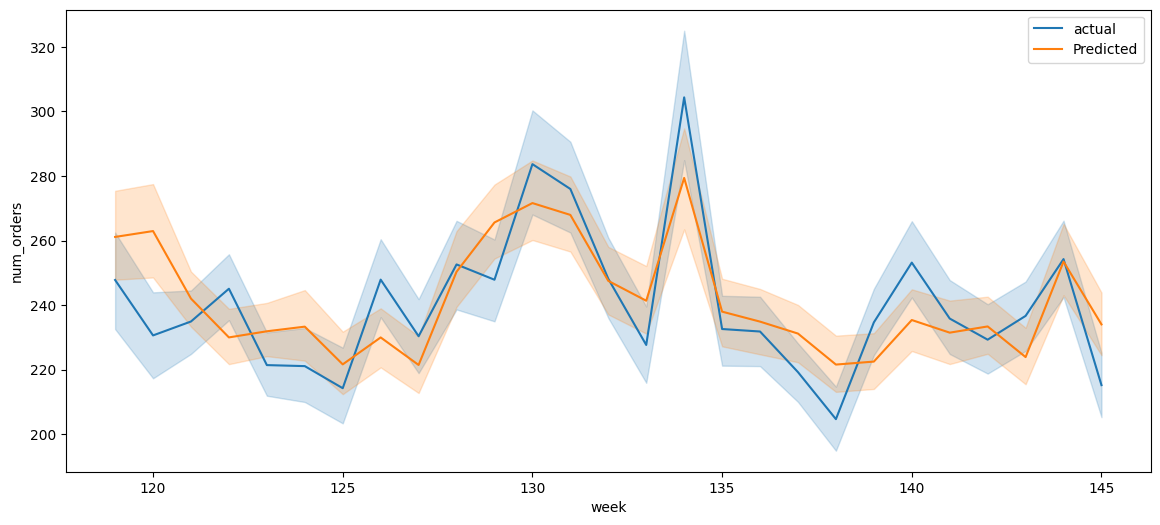

In [51]:
    
plt.figure(figsize=(14,6))
sns.lineplot(x=y_test.index,y=y_test,label='actual')
sns.lineplot(x=y_test.index,y=y_pred.flatten(),label='Predicted')

In [59]:
joblib.dump(best_model,'lstmhyperparameter.pkl')

['lstmhyperparameter.pkl']

In [60]:
best_model.save('lstmhyperparameter.h5')


In [10]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(12, 1)))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(15, activation='relu'))
model.add(Dense(1))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 256)        │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 15)             │           495 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301,695 (1.15 MB)

 Trainable params: 301,695 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [30]:
model.fit(x_train, y_train, epochs=25, batch_size=128, validation_data=(x_test, y_test))


Epoch 1/25
2518/2518 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 114669.7500 - mae: 208.7567 - val_loss: 103572.8594 - val_mae: 207.8685
Epoch 2/25
2518/2518 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 73968.4297 - mae: 159.8752 - val_loss: 34793.3555 - val_mae: 111.4457
Epoch 3/25
2518/2518 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 31100.1348 - mae: 101.2869 - val_loss: 27555.8027 - val_mae: 95.6107
Epoch 4/25
2518/2518 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 25693.1426 - mae: 92.1567 - val_loss: 26161.7188 - val_mae: 93.7906
Epoch 5/25
2518/2518 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 23045.2090 - mae: 87.6285 - val_loss: 25940.3516 - val_mae: 90.7694
Epoch 6/25
2518/2518 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 21623.0938 - mae: 84.6656 - val_loss: 23268.3672 - val_mae: 89.4629
Epoch 7/25
2518/2518 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 19807.9707 - mae: 81.3714 - val_loss: 23019.9961 - val_mae: 87.6032
Epoch 8/25
2518/2518 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 19055.2812 - 

In [33]:
y_pred = model.predict(x_test)



2287/2287 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [34]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score=r2_score(y_test, y_pred)
mape=mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'r2_score: {r2_score}')
print(f'mean_absolute_percentage_error:{mape}')

Mean Squared Error: 21556.225214592825
Mean Absolute Error: 81.85651688571005
r2_score: 0.7915755703439222
mean_absolute_percentage_error:0.6856896515582379


In [36]:
joblib.dump(model,'lstmhyperparameter.pkl')

['lstmhyperparameter.pkl']

In [3]:
lstm=joblib.load('Model/lstmhyperparameter.pkl')

In [10]:
input_data = np.array([145,145,76,1558,563,562,0,0,614,85,0,3.0,7,0])
input_data_reshaped = input_data.reshape(1, -1)


In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(input_data_reshaped)

In [12]:
prediction = lstm.predict(scaled_data)

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
[[121.84472]]
